# Home Credit Scorecard Model - Naufal Hadi Darmawan

## Project Domain

### Background Problem
Home Credit is currently utilizing various statistical methods and Machine Learning techniques to predict credit scores. Ensuring accurate credit assessment is crucial, as it prevents financially capable customers from being rejected while also mitigating the risk of loan defaults. By fully leveraging the potential of available data, we can optimize loan approvals with appropriate principal amounts, maturity periods, and repayment schedules that encourage successful repayments.

### Problem Statements
- How can we improve the accuracy of credit scoring models to minimize false rejections of creditworthy applicants?
- What machine learning techniques can be applied to enhance the prediction of loan repayment success?
- How can we ensure that loan terms (principal, maturity, and repayment calendar) are aligned with customers’ financial capabilities?

### Goals
- Develop a robust credit scoring model that accurately predicts a customer's likelihood of loan repayment.
- Implement machine learning models, including Logistic Regression and others, to compare performance and effectiveness.
- Ensure that the loan approval process is optimized to support both business sustainability and customer success.

### Solution Statement (Approaches)
To achieve the goals outlined above, we will employ the following approaches:
- Data Preprocessing: Handle missing values, perform feature engineering, and normalize data for better model performance.
- Exploratory Data Analysis (EDA): Gain insights into key factors influencing credit risk using statistical analysis and visualizations.
- Machine Learning Models:
  - Logistic Regression: A baseline model for binary classification of loan repayment likelihood.
  - Advanced ML Techniques: Implement models such as XGBoost, LightGBM, and Random Forest to improve prediction accuracy.
- Model Evaluation & Optimization: Use metrics like Accuracy and F1-Score to assess model performance.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import math
warnings.filterwarnings('ignore')

# For preprocessing and modeling
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_selection import SelectFromModel, RFECV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb
import lightgbm as lgb
import shap

In [3]:
pd.set_option('max_info_columns', 200)
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows if needed
pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping


## Exploratory Data Analysis

To begin our Exploratory Data Analysis (EDA), we first loaded the dataset, then I performed an initial inspection using **.head()** to get a quick glimpse of the first few rows, followed by .shape to confirm the dataset's size.

Next, **.info()** provided an overview of the dataset’s structure, showing the data types of each column and helping us identify potential missing values. A deeper look at missing values revealed that some features had significant null values, requiring further handling.

To ensure data integrity, we checked for duplicate entries but found none, indicating that each row represents a unique observation. This initial analysis helped us understand the dataset’s quality, completeness, and potential preprocessing needs before diving into deeper feature exploration and visualization.

In [4]:
# Load data
train_data = pd.read_csv('home-credit-default-risk/application_train.csv')
test_data = pd.read_csv('home-credit-default-risk/application_test.csv')

In [5]:
train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
train_data.shape

(307511, 122)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [8]:
train_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [9]:
train_data.duplicated().sum()

0

In [10]:
train_data["TARGET"].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

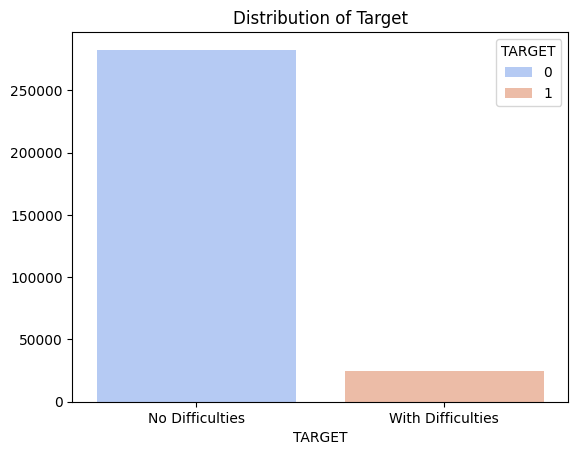

In [11]:
sns.countplot(x="TARGET", hue="TARGET", data=train_data, palette="coolwarm")
plt.title("Distribution of Target")
plt.ylabel('')
plt.xticks(ticks=[0, 1], labels=['No Difficulties', 'With Difficulties'])  # Mengatur label sumbu x
plt.show()

The dataset contains 307,511 applicants, with the majority (282,686 or ~92%) classified as "No Difficulties" (TARGET = 0), meaning they had no issues repaying their loans. On the other hand, 24,825 applicants (~8%) fell into the "With Difficulties" category (TARGET = 1), indicating they struggled with repayment.

This imbalance suggests that most applicants successfully manage their loans, but a small yet significant portion faces financial difficulties. Such an imbalance is crucial when building predictive models, as we may need to apply techniques like oversampling.

Understanding these proportions helps us identify risk factors associated with loan difficulties and explore potential features influencing repayment challenges.

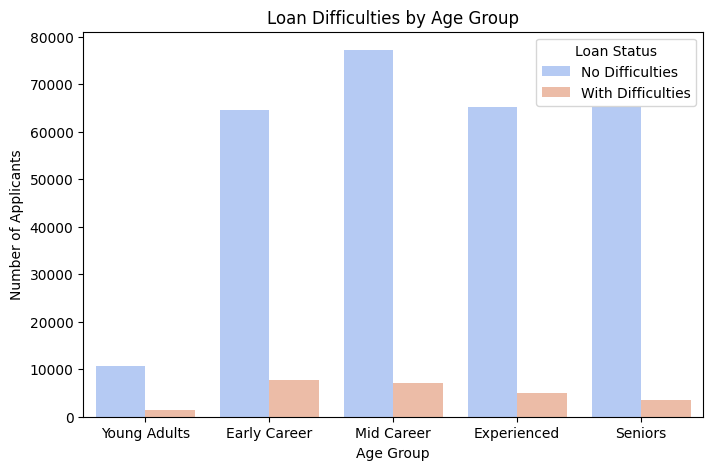

In [12]:
# Convert DAYS_BIRTH to Age in Years
age_years = abs(train_data["DAYS_BIRTH"]) / 365

# Define Age Groups
bins = [18, 25, 35, 45, 55, 100]
labels = ["Young Adults", "Early Career", "Mid Career", "Experienced", "Seniors"]
age_groups = pd.cut(age_years, bins=bins, labels=labels)

# Plot Age Group Distribution by Loan Status
plt.figure(figsize=(8, 5))
sns.countplot(x=age_groups, hue=train_data["TARGET"], palette="coolwarm")
plt.title("Loan Difficulties by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Applicants")
plt.legend(title="Loan Status", labels=["No Difficulties", "With Difficulties"])
plt.show()

Analyzing loan difficulties across different age groups, we observe distinct patterns that highlight financial stability trends over time:

* Mid-Career (84,274 applicants) and Early Career (72,302 applicants) represent the largest segments of loan applicants. This suggests that people in their 30s and 40s are the most active in seeking financial assistance, possibly due to homeownership, family expenses, or career investments.

* Experienced professionals (70,077 applicants) and Seniors (68,699 applicants) maintain a strong presence in the loan market, likely leveraging credit for retirement planning, business ventures, or real estate investments.

* Young Adults (12,159 applicants) make up the smallest group. This could be attributed to limited credit history, lower income levels, or a preference for alternative financial options.

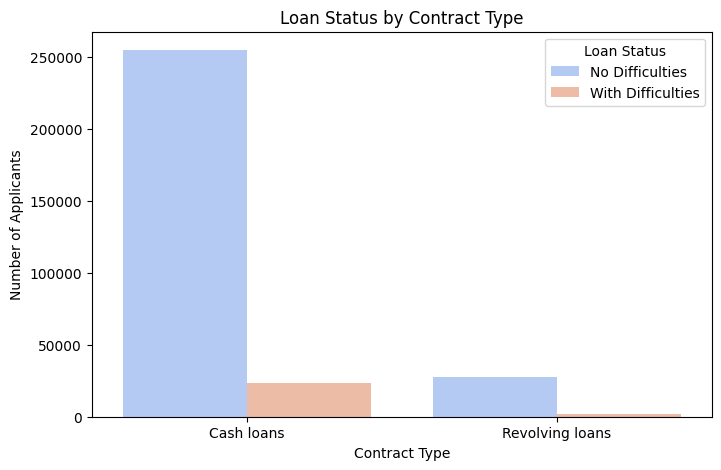

In [13]:
# Loan Status by Contract Type
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x="NAME_CONTRACT_TYPE", hue="TARGET", palette="coolwarm")
plt.title("Loan Status by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Number of Applicants")
plt.legend(title="Loan Status", labels=["No Difficulties", "With Difficulties"])
plt.show()

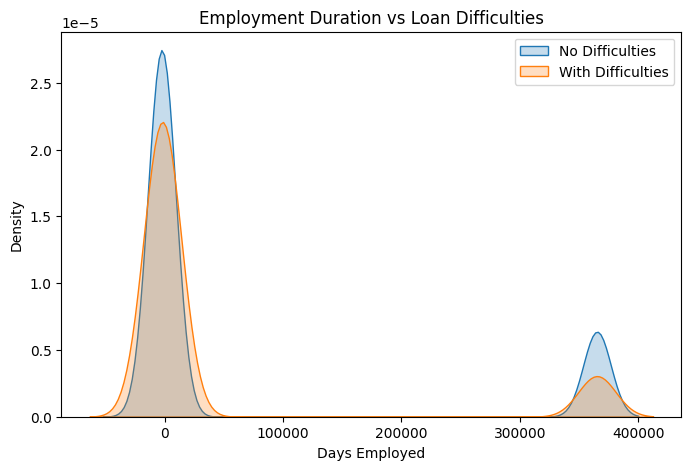

In [16]:
# Employment Duration & Loan Risk
plt.figure(figsize=(8,5))
sns.kdeplot(train_data[train_data["TARGET"] == 0]["DAYS_EMPLOYED"], label="No Difficulties", shade=True)
sns.kdeplot(train_data[train_data["TARGET"] == 1]["DAYS_EMPLOYED"], label="With Difficulties", shade=True)
plt.title("Employment Duration vs Loan Difficulties")
plt.xlabel("Days Employed")
plt.ylabel("Density")
plt.legend()
plt.show()

This plot displays the distribution of employment duration (in days) among individuals who experienced loan difficulties and those who didn't. It reveals two distinct peaks: a large one near zero, indicating a high concentration of individuals with short employment periods, and a smaller one around 350,000 days, suggesting a group with exceptionally long employment. The plot shows that a higher proportion of those with shorter employment durations encountered loan difficulties, as the "With Difficulties" line is slightly higher at the first peak. Conversely, individuals with longer employment histories, especially in the plateau region between the peaks, generally experienced fewer loan difficulties, as evidenced by the dominance of the "No Difficulties" line. The second peak, though smaller, suggests that even with very long employment, some individuals still face loan challenges.

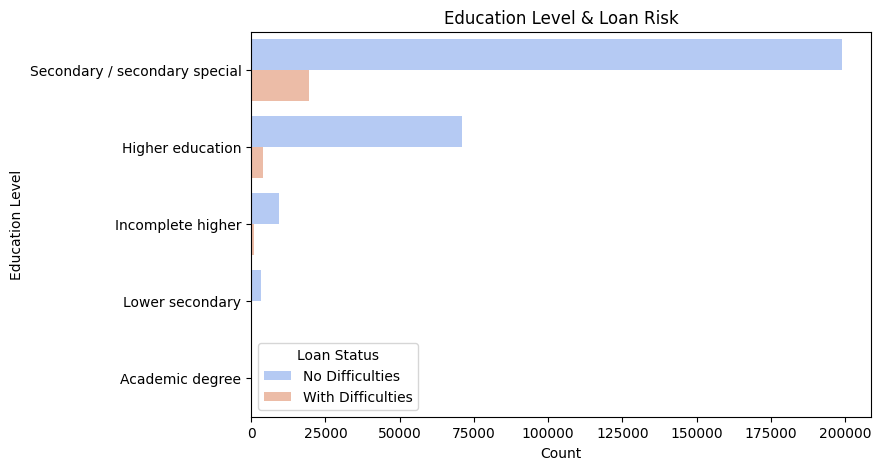

In [17]:
# Education Level & Loan Default
plt.figure(figsize=(8,5))
edu_order = train_data["NAME_EDUCATION_TYPE"].value_counts().index
sns.countplot(y="NAME_EDUCATION_TYPE", hue="TARGET", data=train_data, order=edu_order, palette="coolwarm")
plt.title("Education Level & Loan Risk")
plt.xlabel("Count")
plt.ylabel("Education Level")
plt.legend(title="Loan Status", labels=["No Difficulties", "With Difficulties"])
plt.show()

Education plays a crucial role in financial stability and creditworthiness, and our analysis of loan applicants by education level reveals key insights:

* Secondary / Secondary Special (218,391 applicants) form the majority, indicating that most loan applicants have a basic or vocational education. This group may include blue-collar workers, service industry employees, and skilled tradespeople, highlighting the need for accessible financial products tailored to their income levels.

* Higher Education (74,863 applicants) represents a significant portion of borrowers, suggesting that individuals with a college or university degree actively seek financial assistance, possibly for homeownership, business investments, or further education. Their higher qualifications may contribute to better financial literacy and loan management.

* Incomplete Higher Education (10,277 applicants) reflects individuals who started but did not complete their college studies. This could include young professionals or students transitioning into the workforce, who may have limited credit history and fluctuating income levels.

* Lower Secondary (3,816 applicants) and Academic Degree Holders (164 applicants) represent the smallest segments. The lower-secondary group may include early school dropouts or unskilled workers, potentially facing financial instability. In contrast, academic degree holders—likely PhD graduates or researchers are a niche segment, possibly having alternative financial resources or lower reliance on traditional loans.

This breakdown helps financial institutions tailor credit policies, financial literacy programs, and risk assessment models based on borrowers' educational backgrounds.

### Feature Selection

In [19]:
# 1. Drop columns with too many missing values (threshold: 50%)
missing_threshold = 0.5
missing_percent = train_data.isnull().mean()
train_data = train_data.drop(columns=missing_percent[missing_percent > missing_threshold].index)

# 2. Fill missing values
num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

num_cols = train_data.select_dtypes(include=["number"]).columns
cat_cols = train_data.select_dtypes(include=["object"]).columns

train_data[num_cols] = num_imputer.fit_transform(train_data[num_cols])
train_data[cat_cols] = cat_imputer.fit_transform(train_data[cat_cols])

# 3. Remove highly correlated numerical features
corr_matrix = train_data[num_cols].corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]
train_data = train_data.drop(columns=to_drop)

# 4. Feature Selection using Mutual Information (keep categorical unencoded)
target = train_data["TARGET"]
features = train_data.drop(columns=["TARGET"])

# Encode categorical variables as integers for mutual_info_classif
train_data_encoded = features.copy()
for col in cat_cols:
    train_data_encoded[col] = LabelEncoder().fit_transform(train_data_encoded[col])

# Compute mutual information scores
mi_scores = mutual_info_classif(train_data_encoded, target)
mi_scores = pd.Series(mi_scores, index=features.columns).sort_values(ascending=False)

# Select top 30 important features
selected_features = mi_scores.head(30).index
train_data_selected = train_data[selected_features].copy()
train_data_selected["TARGET"] = target  # Add target back

print("Selected Features:", selected_features)

Selected Features: Index(['FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_3', 'FLAG_OWN_REALTY',
       'NAME_HOUSING_TYPE', 'NAME_TYPE_SUITE', 'NAME_EDUCATION_TYPE',
       'NAME_INCOME_TYPE', 'REGION_RATING_CLIENT', 'FLOORSMAX_AVG',
       'OCCUPATION_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'NAME_FAMILY_STATUS',
       'YEARS_BEGINEXPLUATATION_AVG', 'EXT_SOURCE_3', 'FLAG_PHONE',
       'AMT_ANNUITY', 'EXT_SOURCE_2', 'DAYS_EMPLOYED', 'TOTALAREA_MODE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'REG_CITY_NOT_WORK_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'AMT_CREDIT',
       'FLAG_WORK_PHONE', 'LIVE_CITY_NOT_WORK_CITY', 'CNT_CHILDREN',
       'HOUR_APPR_PROCESS_START'],
      dtype='object')


In [20]:
train_data_selected.head()

,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_DOCUMENT_3,FLAG_OWN_REALTY,NAME_HOUSING_TYPE,NAME_TYPE_SUITE,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,REGION_RATING_CLIENT,FLOORSMAX_AVG,OCCUPATION_TYPE,CODE_GENDER,FLAG_OWN_CAR,NAME_FAMILY_STATUS,YEARS_BEGINEXPLUATATION_AVG,EXT_SOURCE_3,FLAG_PHONE,AMT_ANNUITY,EXT_SOURCE_2,DAYS_EMPLOYED,TOTALAREA_MODE,AMT_REQ_CREDIT_BUREAU_YEAR,REG_CITY_NOT_WORK_CITY,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,AMT_CREDIT,FLAG_WORK_PHONE,LIVE_CITY_NOT_WORK_CITY,CNT_CHILDREN,HOUR_APPR_PROCESS_START,TARGET
0,1.0,1.0,1.0,Y,House / apartment,Unaccompanied,Secondary / secondary special,Working,2.0,0.0833,Laborers,M,N,Single / not married,0.9722,0.139376,1.0,24700.5,0.262949,-637.0,0.0149,1.0,0.0,WEDNESDAY,Business Entity Type 3,406597.5,0.0,0.0,0.0,10.0,1.0
1,1.0,1.0,1.0,N,House / apartment,Family,Higher education,State servant,1.0,0.2917,Core staff,F,N,Married,0.9851,0.535276,1.0,35698.5,0.622246,-1188.0,0.0714,0.0,0.0,MONDAY,School,1293502.5,0.0,0.0,0.0,11.0,0.0
2,1.0,1.0,0.0,Y,House / apartment,Unaccompanied,Secondary / secondary special,Working,2.0,0.1667,Laborers,M,Y,Single / not married,0.9816,0.729567,1.0,6750.0,0.555912,-225.0,0.0688,0.0,0.0,MONDAY,Government,135000.0,1.0,0.0,0.0,9.0,0.0
3,1.0,1.0,1.0,Y,House / apartment,Unaccompanied,Secondary / secondary special,Working,2.0,0.1667,Laborers,F,N,Civil marriage,0.9816,0.535276,0.0,29686.5,0.650442,-3039.0,0.0688,1.0,0.0,WEDNESDAY,Business Entity Type 3,312682.5,0.0,0.0,0.0,17.0,0.0
4,1.0,1.0,0.0,Y,House / apartment,Unaccompanied,Secondary / secondary special,Working,2.0,0.1667,Core staff,M,N,Single / not married,0.9816,0.535276,0.0,21865.5,0.322738,-3038.0,0.0688,0.0,1.0,THURSDAY,Religion,513000.0,0.0,1.0,0.0,11.0,0.0


In [21]:
train_data_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   FLAG_MOBIL                   307511 non-null  float64
 1   FLAG_CONT_MOBILE             307511 non-null  float64
 2   FLAG_DOCUMENT_3              307511 non-null  float64
 3   FLAG_OWN_REALTY              307511 non-null  object 
 4   NAME_HOUSING_TYPE            307511 non-null  object 
 5   NAME_TYPE_SUITE              307511 non-null  object 
 6   NAME_EDUCATION_TYPE          307511 non-null  object 
 7   NAME_INCOME_TYPE             307511 non-null  object 
 8   REGION_RATING_CLIENT         307511 non-null  float64
 9   FLOORSMAX_AVG                307511 non-null  float64
 10  OCCUPATION_TYPE              307511 non-null  object 
 11  CODE_GENDER                  307511 non-null  object 
 12  FLAG_OWN_CAR                 307511 non-null  object 
 13 

In [22]:
train_data_selected.isnull().sum()

FLAG_MOBIL                     0
FLAG_CONT_MOBILE               0
FLAG_DOCUMENT_3                0
FLAG_OWN_REALTY                0
NAME_HOUSING_TYPE              0
NAME_TYPE_SUITE                0
NAME_EDUCATION_TYPE            0
NAME_INCOME_TYPE               0
REGION_RATING_CLIENT           0
FLOORSMAX_AVG                  0
OCCUPATION_TYPE                0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
NAME_FAMILY_STATUS             0
YEARS_BEGINEXPLUATATION_AVG    0
EXT_SOURCE_3                   0
FLAG_PHONE                     0
AMT_ANNUITY                    0
EXT_SOURCE_2                   0
DAYS_EMPLOYED                  0
TOTALAREA_MODE                 0
AMT_REQ_CREDIT_BUREAU_YEAR     0
REG_CITY_NOT_WORK_CITY         0
WEEKDAY_APPR_PROCESS_START     0
ORGANIZATION_TYPE              0
AMT_CREDIT                     0
FLAG_WORK_PHONE                0
LIVE_CITY_NOT_WORK_CITY        0
CNT_CHILDREN                   0
HOUR_APPR_PROCESS_START        0
TARGET    

In [23]:
train_data_selected.describe()

,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_DOCUMENT_3,REGION_RATING_CLIENT,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_AVG,EXT_SOURCE_3,FLAG_PHONE,AMT_ANNUITY,EXT_SOURCE_2,DAYS_EMPLOYED,TOTALAREA_MODE,AMT_REQ_CREDIT_BUREAU_YEAR,REG_CITY_NOT_WORK_CITY,AMT_CREDIT,FLAG_WORK_PHONE,LIVE_CITY_NOT_WORK_CITY,CNT_CHILDREN,HOUR_APPR_PROCESS_START,TARGET
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.999997,0.998133,0.710023,2.052463,0.196633,0.979620,0.515695,0.281066,27108.487841,5.145034e-01,63815.045904,0.086258,1.778463,0.230454,5.990260e+05,0.199368,0.179555,0.417052,12.063419,0.080729
std,0.001803,0.043164,0.453752,0.509034,0.106761,0.042429,0.174736,0.449521,14493.461065,1.908699e-01,141275.766519,0.079110,1.765523,0.421124,4.024908e+05,0.399526,0.383817,0.722121,3.265832,0.272419
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000527,0.000000,1615.500000,8.173617e-08,-17912.000000,0.000000,0.000000,0.000000,4.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,2.000000,0.166700,0.981600,0.417100,0.000000,16524.000000,3.929737e-01,-2760.000000,0.067000,1.000000,0.000000,2.700000e+05,0.000000,0.000000,0.000000,10.000000,0.000000
50%,1.000000,1.000000,1.000000,2.000000,0.166700,0.981600,0.535276,0.000000,24903.000000,5.659614e-01,-1213.000000,0.068800,1.000000,0.000000,5.135310e+05,0.000000,0.000000,0.000000,12.000000,0.000000
75%,1.000000,1.000000,1.000000,2.000000,0.166700,0.982100,0.636376,1.000000,34596.000000,6.634218e-01,-289.000000,0.070300,3.000000,0.000000,8.086500e+05,0.000000,0.000000,1.000000,14.000000,0.000000
max,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,0.896010,1.000000,258025.500000,8.549997e-01,365243.000000,1.000000,25.000000,1.000000,4.050000e+06,1.000000,1.000000,19.000000,23.000000,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

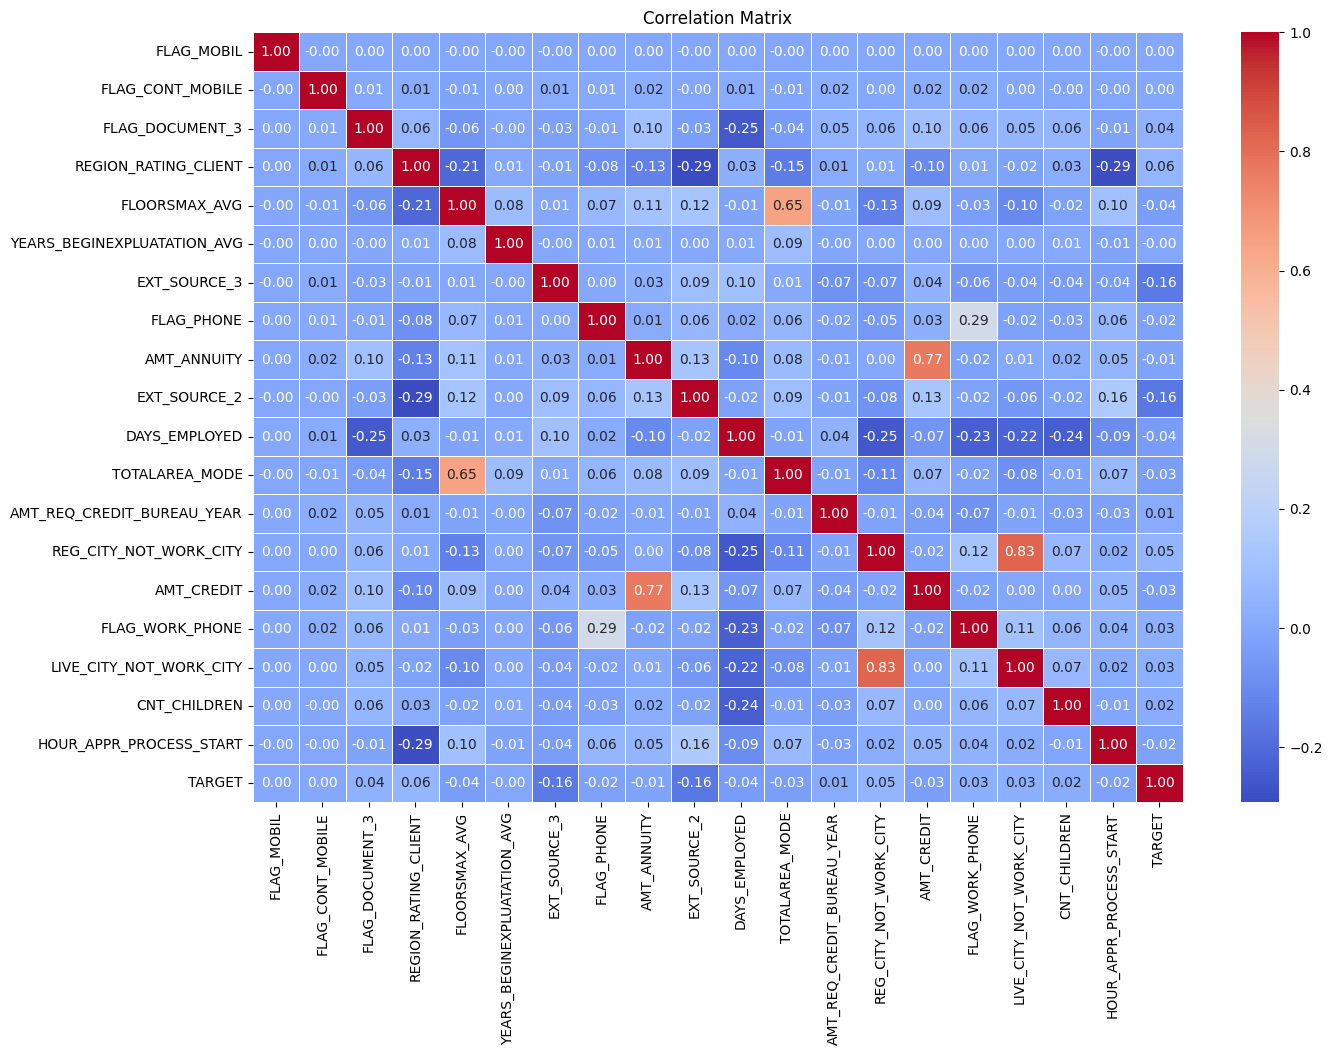

In [24]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
# Select only numerical columns
numerical_data = train_data_selected.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

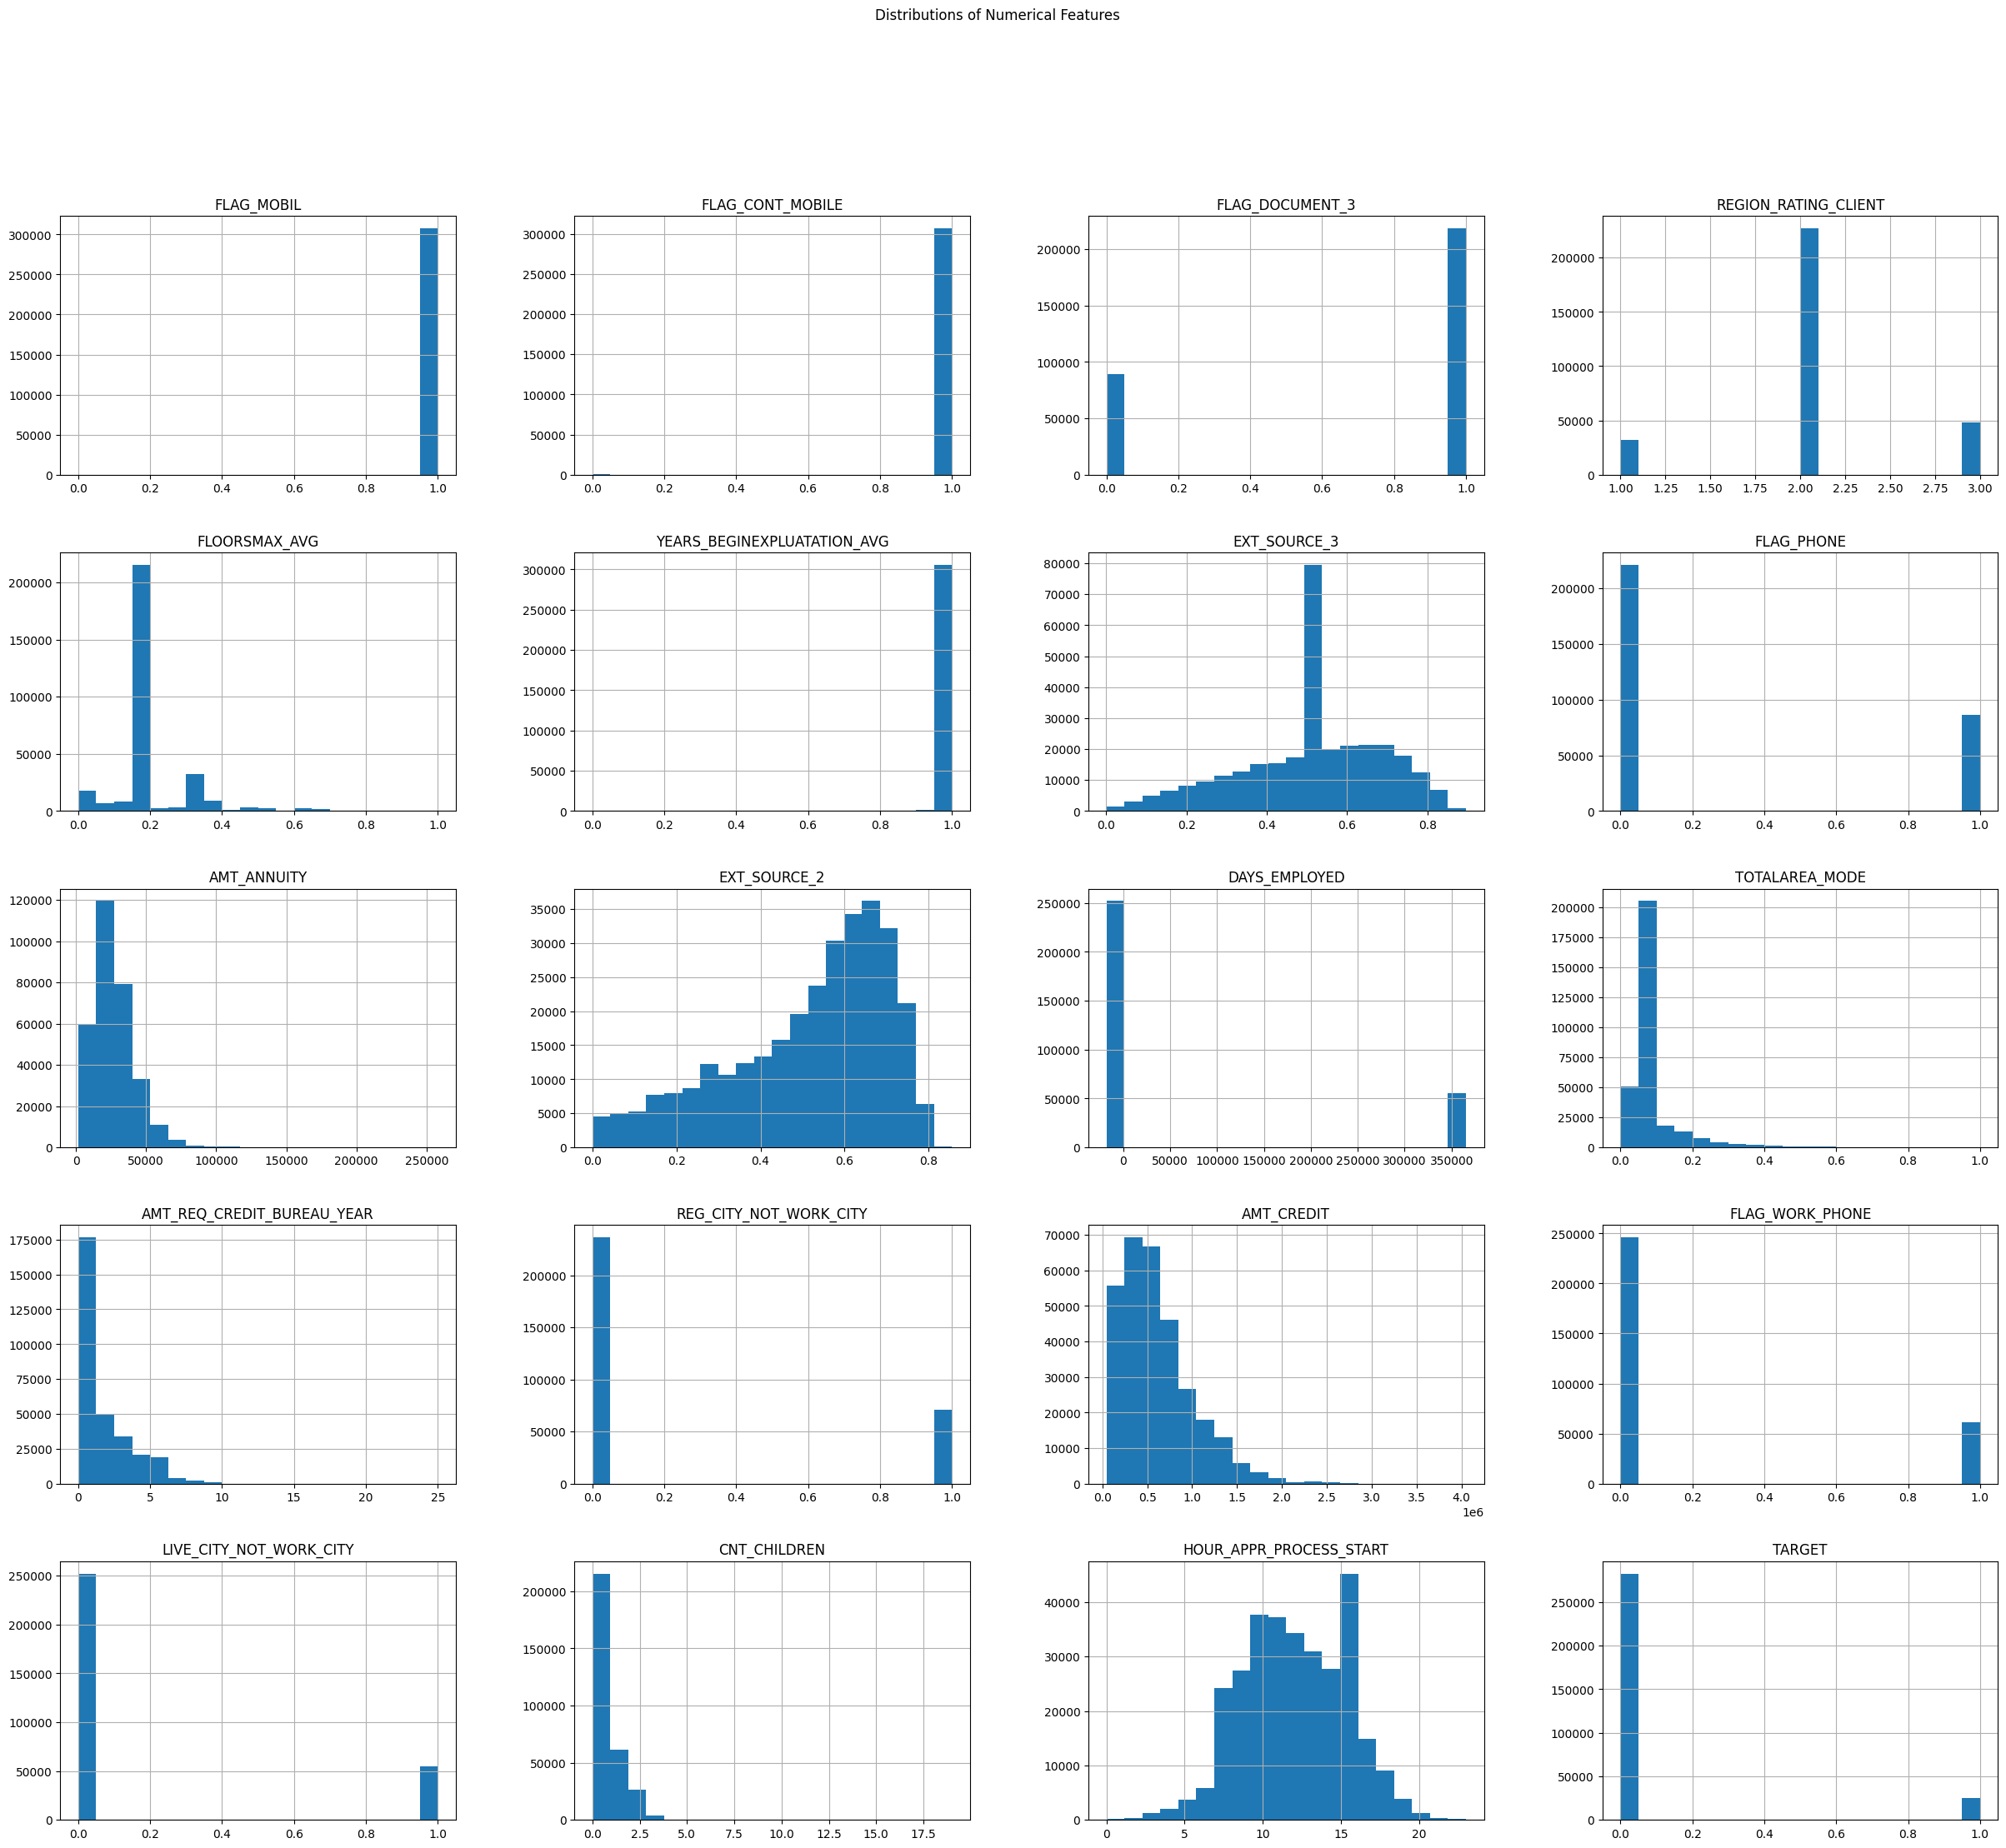

In [25]:
# Histograms of numerical features
numerical_columns = train_data_selected.select_dtypes(include=[np.number]).columns
train_data_selected[numerical_columns].hist(bins=20, figsize=(30, 25))
plt.suptitle("Distributions of Numerical Features")
plt.show()

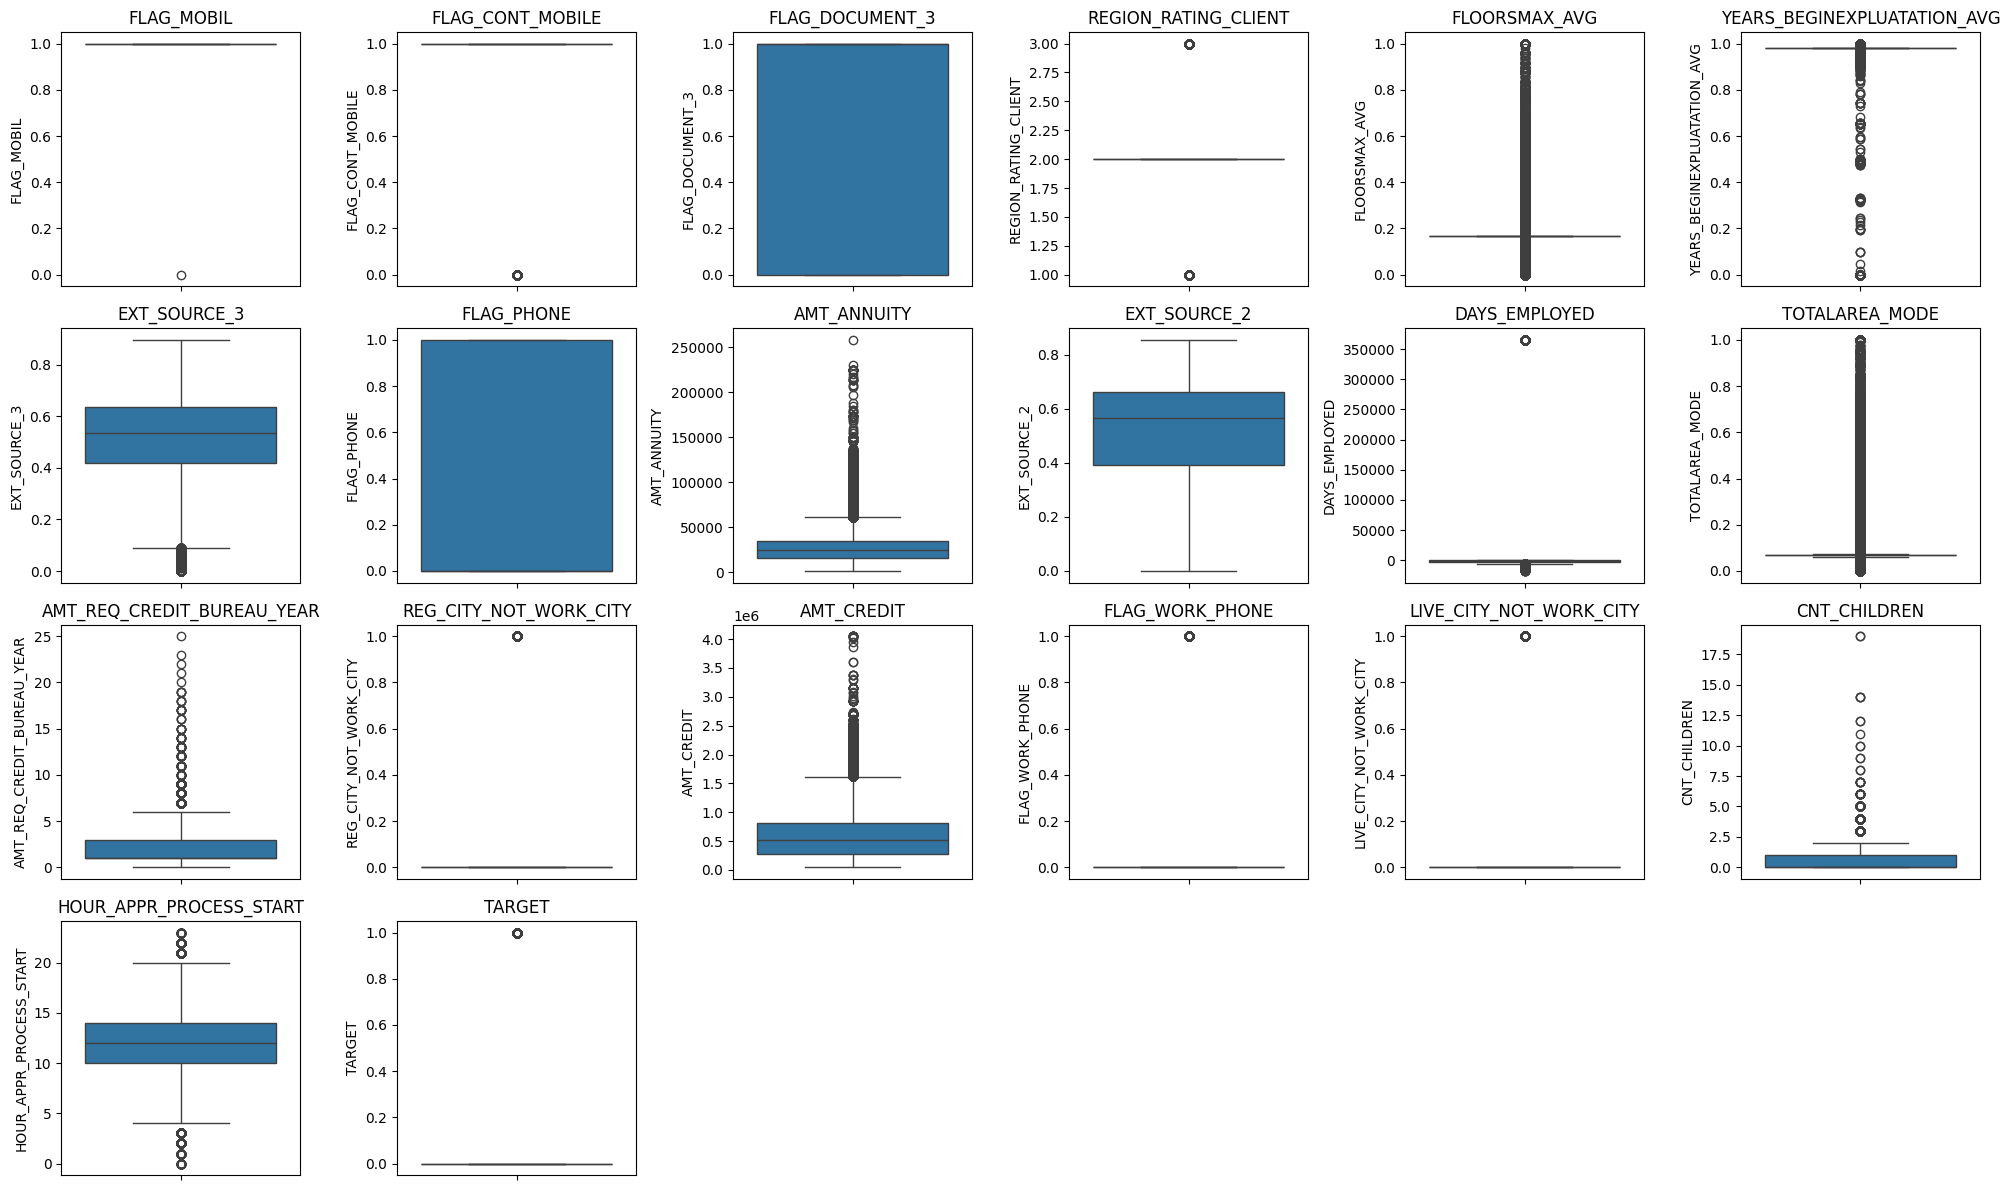

In [26]:
# Determine the number of rows needed
num_cols = len(numerical_columns)
num_rows = math.ceil(num_cols / 6)  # Adjust dynamically for 6 columns per row

plt.figure(figsize=(20, num_rows * 3))  # Adjust figure height

for i, col in enumerate(numerical_columns):
    plt.subplot(num_rows, 6, i + 1)
    sns.boxplot(y=train_data_selected[col])
    plt.title(col)

plt.tight_layout()  # Adjust spacing
plt.show()


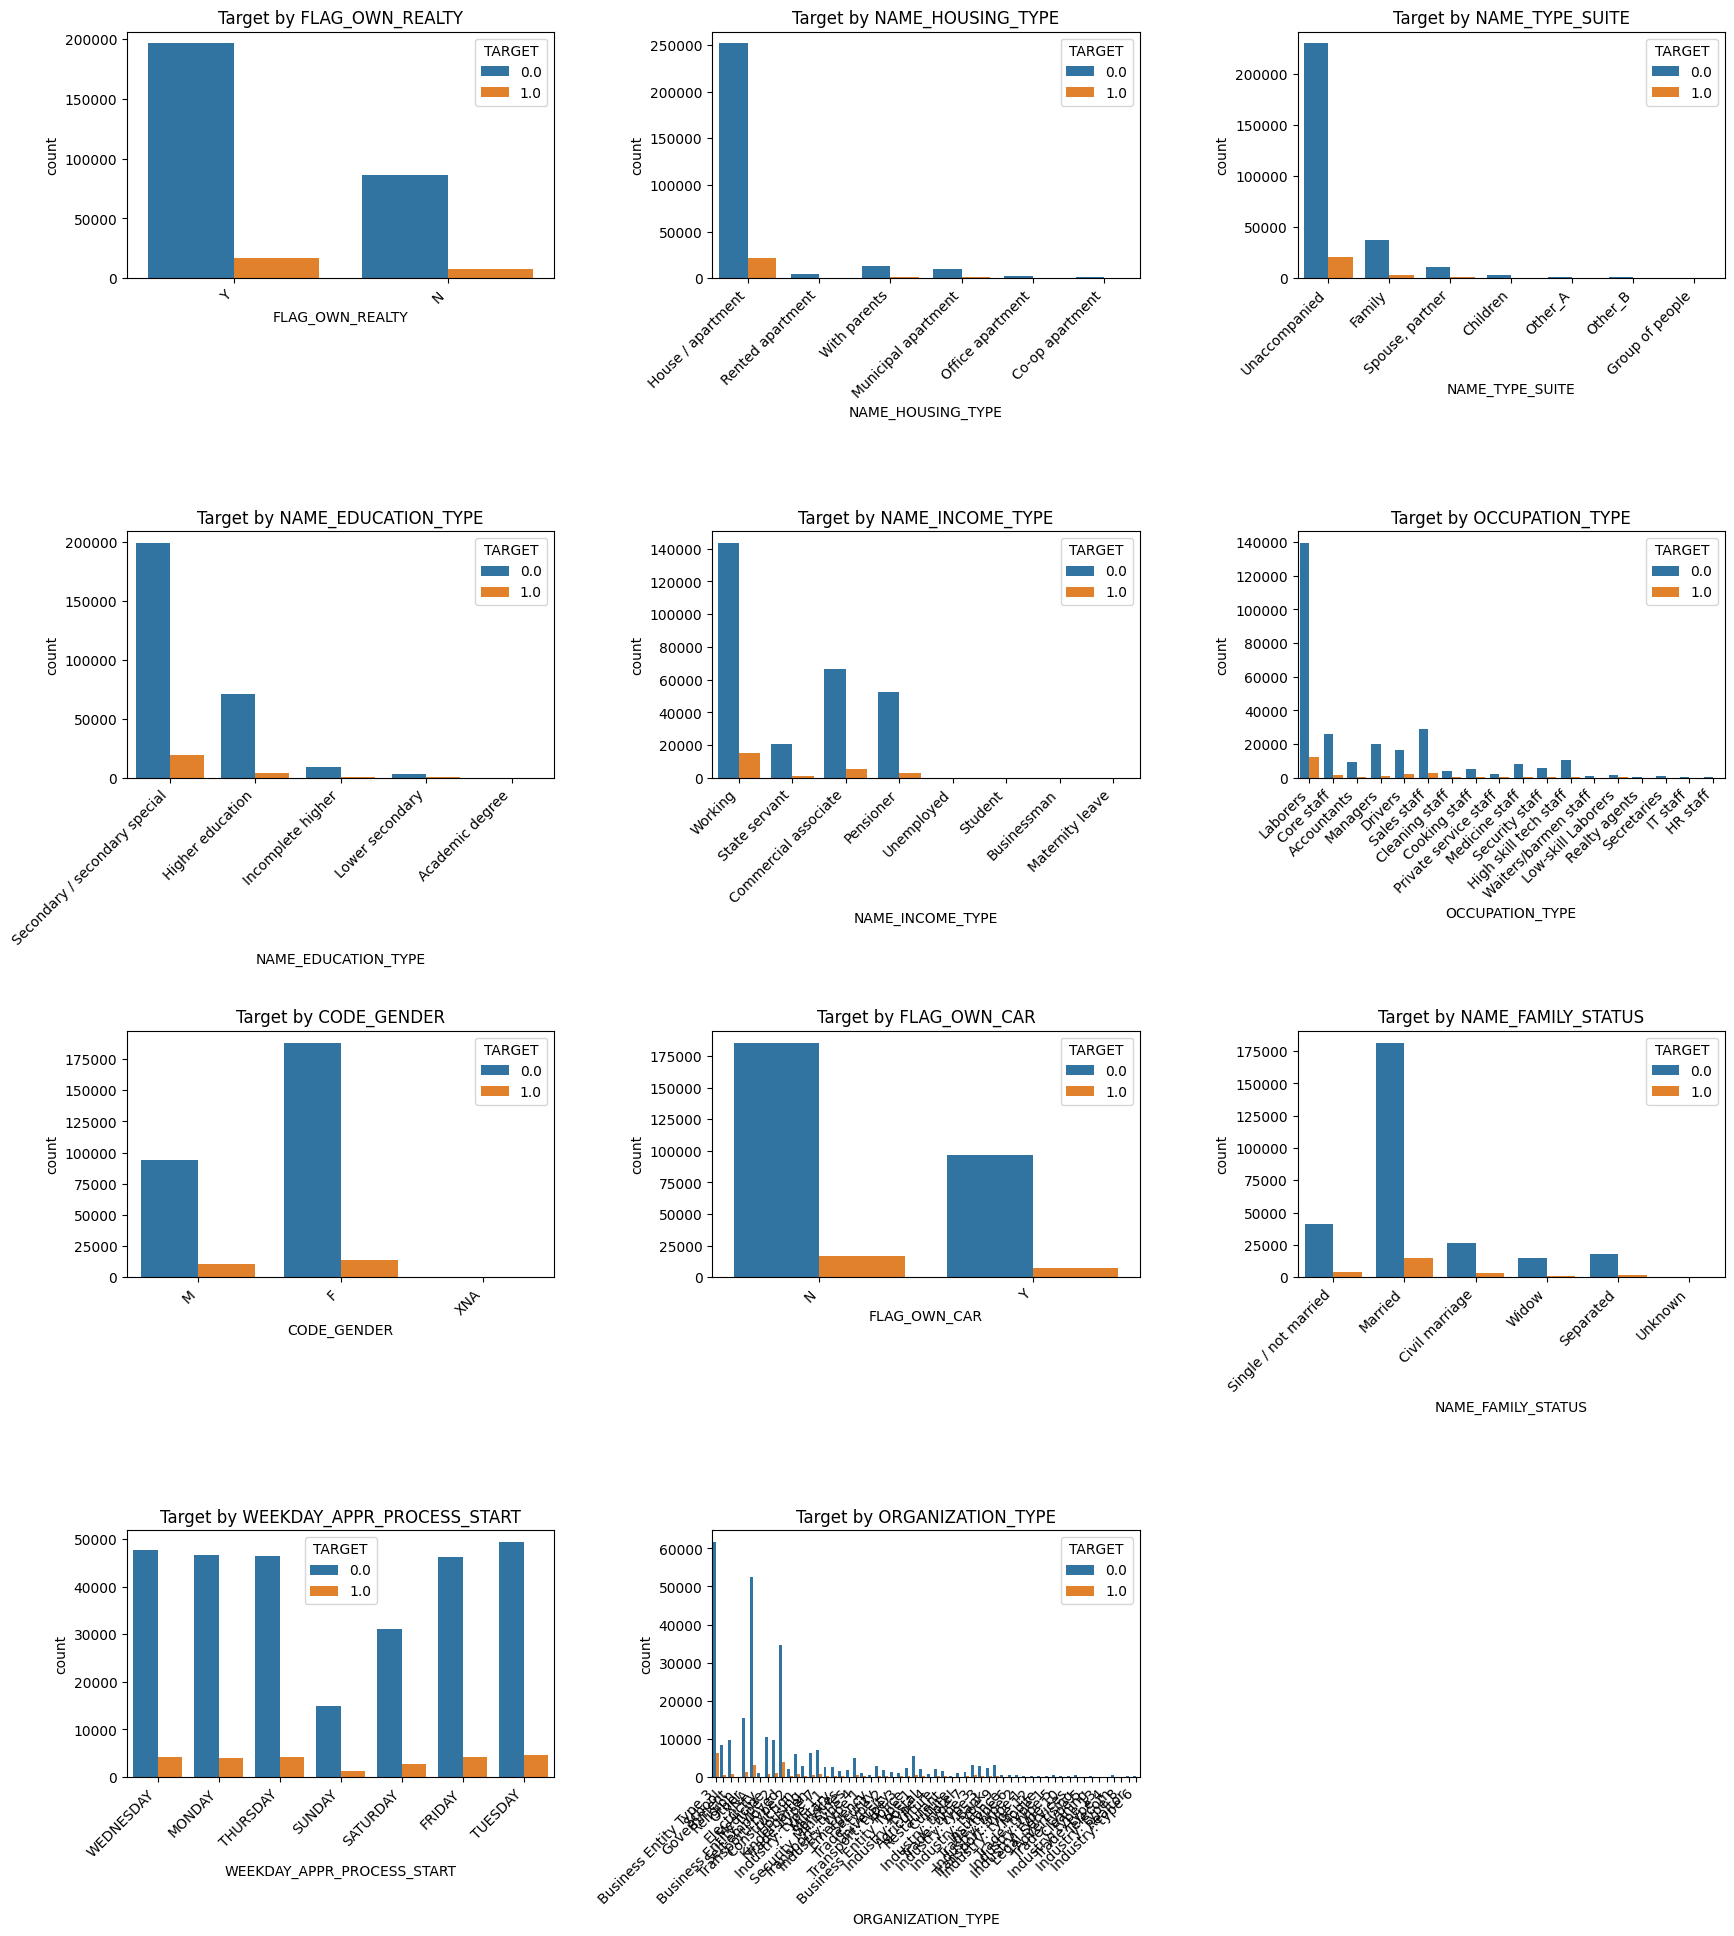

In [27]:
# Countplot for categorical features vs Target
categorical_columns = train_data_selected.select_dtypes(include=[object]).columns

cols = 3  # 3 plots per row
rows = math.ceil(len(categorical_columns) / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
axes = axes.flatten()

# Plot each categorical feature
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, hue="TARGET", data=train_data_selected, ax=axes[i])
    axes[i].set_title(f"Target by {col}", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    for tick in axes[i].get_xticklabels():
        tick.set_ha('right')  # Align x-ticks properly

# Remove extra subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3.0)  # Adjust padding for proper spacing
plt.show()

## Data Preparation

In this section, I prepare the dataset for machine learning modeling by:
* Splitting Features and Target  
This is necessary for machine learning, where we train models using features (X) to predict outcomes (y).
* Identifying Numerical and Categorical Features  
Different preprocessing techniques are required for different data types (e.g., scaling for numerical data, one-hot encoding for categorical data).
* Handling Negative Values in Time-Based Features  
Some time-related features (e.g., DAYS_BIRTH, DAYS_EMPLOYED) are stored as negative values. I convert them to positive.
Why? Negative values can cause confusion and affect model interpretation. Converting them to absolute values ensures consistency.
* Creating a Preprocessing Pipeline
    * Numerical Data Pipeline  
        * Converts negative time values to positive.
        * Fills missing numerical values using median imputation.
        * Standardizes numerical features using StandardScaler (mean=0, std=1).

        **Why?**
        * Median imputation is robust against outliers.
        * Scaling ensures all numerical values are on the same scale, improving model performance.

    * Categorical Data Pipeline
        * Replaces missing categorical values with the most frequent category.
        * Uses one-hot encoding to transform categorical features into numerical format.
        
        **Why?**
        * Missing categorical values are replaced with the most common category to prevent data loss.
        * One-hot encoding converts categorical features into numerical values that ML models can understand.

    * Combining Transformers with ColumnTransformer  
    It allows simultaneous processing of numerical and categorical features, improving efficiency and maintainability.


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
import numpy as np

# Separate features (X) and target (y)
X = train_data_selected.drop(columns=["TARGET"])
y = train_data_selected["TARGET"]

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Handle negative values (convert to positive if needed)
def convert_negative_to_positive(X):
    X = X.copy()
    for col in ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]:
        if col in X.columns:
            X[col] = np.abs(X[col])  # Convert negative to positive
    return X

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('neg_to_pos', FunctionTransformer(convert_negative_to_positive, validate=False)),  # Convert negatives to positives
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply the preprocessing pipeline to the features
X_processed = preprocessor.fit_transform(X)


* Handling Class Imbalance with SMOTE (Synthetic Minority Oversampling Technique)
    * The dataset is imbalanced (fewer loan defaulters than non-defaulters).
    * SMOTE generates synthetic samples to ensure both classes are equally represented, preventing bias in the model.
* Data Splitting
    * It ensures that the model is trained on one part of the data and evaluated on another, preventing overfitting and providing a reliable measure of model performance.
    * It sets aside 10% of the data for testing and 90% for training. 90% ensures the model has enough examples to learn patterns. 10% test set is enough to evaluate performance without sacrificing training data. Since we used SMOTE to handle class imbalance, we still have enough minority class examples in both training and test sets.

In [29]:
# Oversample for handle the class imbalance
sm = SMOTE(random_state = 42)
X_over, y_over = sm.fit_resample(X_processed, y.ravel())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.1, random_state=42)

In [30]:
X_train.shape

(508834, 141)

In [31]:
X_test.shape

(56538, 141)

## Modeling

### Logistic Regression
* Type: Linear Model
* Best For: Simple and interpretable models for binary classification
* How it works: Logistic Regression estimates the probability that a given input belongs to class 1 using the sigmoid function
* Advantages  
    ✅ Simple & interpretable—coefficients show feature importance.  
    ✅ Fast training & low computational cost.

* Limitations  
    ❌ Assumes linear relationships between features and log-odds.  
    ❌ Less effective for complex patterns in data.

              precision    recall  f1-score   support

         0.0       0.69      0.69      0.69     28456
         1.0       0.68      0.68      0.68     28082

    accuracy                           0.69     56538
   macro avg       0.69      0.69      0.69     56538
weighted avg       0.69      0.69      0.69     56538



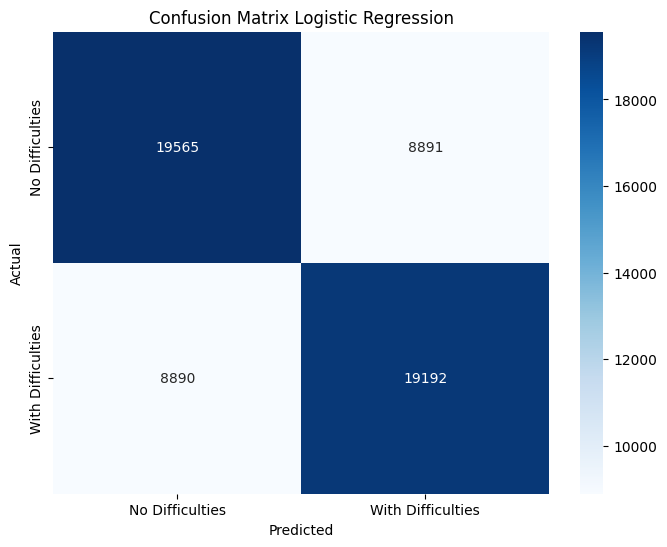

In [32]:
# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Difficulties', 'With Difficulties'],
            yticklabels=['No Difficulties', 'With Difficulties'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Logistic Regression')
plt.show()


### XGBoost
* Type: Gradient Boosting Decision Trees (GBDT)
* Best For: Handling complex patterns and large datasets efficiently
* How It Works: 
    - XGBoost builds an ensemble of decision trees, where each tree corrects errors made by previous trees.
    - Uses gradient boosting, which minimizes loss by adjusting weights using gradient descent.
    - Each new tree focuses on reducing errors from previous trees.
* Key Features  
    ✅ Handles missing values automatically.  
    ✅ Regularization (L1 & L2) prevents overfitting.  
    ✅ Parallel processing speeds up training.  

* Limitations  
    ❌ Computationally expensive for very large datasets.  
    ❌ Requires hyperparameter tuning for optimal performance.

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     28456
         1.0       1.00      0.91      0.95     28082

    accuracy                           0.95     56538
   macro avg       0.96      0.95      0.95     56538
weighted avg       0.96      0.95      0.95     56538



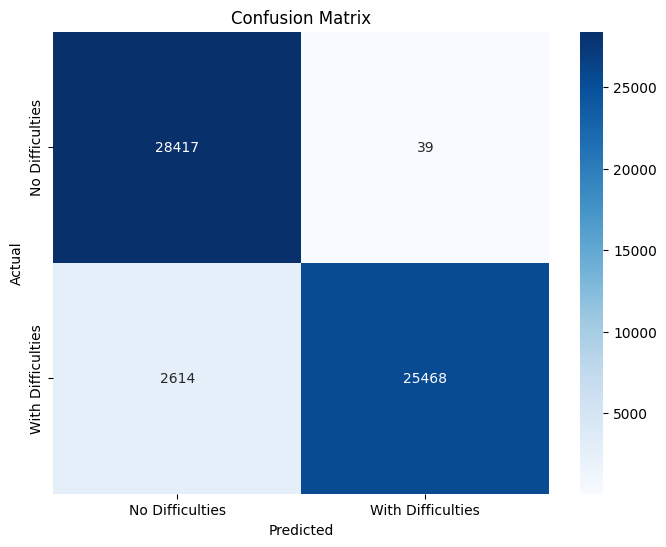

In [33]:
# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(n_jobs=-1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_xgb))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Difficulties', 'With Difficulties'],
            yticklabels=['No Difficulties', 'With Difficulties'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### LightGBM

* Type: Gradient Boosting Decision Trees (GBDT)
* Best For: Large datasets with high-dimensional features
* How It Works: Similar to XGBoost but optimized for speed and efficiency.
Uses a technique called leaf-wise growth instead of level-wise growth in decision trees:
    * XGBoost: Grows trees level-wise (adding nodes evenly).
    * LightGBM: Grows trees leaf-wise (expanding only the most important nodes).
* This makes LightGBM faster and more memory efficient than XGBoost.
* Key Features  
    ✅ Handles large datasets with ease.  
    ✅ Faster training and lower memory usage than XGBoost.  
    ✅ Good at capturing complex relationships in data.  
* Limitations  
    ❌ Sensitive to imbalanced data (may need class weighting or SMOTE).  
    ❌ More prone to overfitting compared to XGBoost.

[LightGBM] [Info] Number of positive: 254604, number of negative: 254230
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.084384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 28165
[LightGBM] [Info] Number of data points in the train set: 508834, number of used features: 137
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500368 -> initscore=0.001470
[LightGBM] [Info] Start training from score 0.001470
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     28456
         1.0       1.00      0.91      0.95     28082

    accuracy                           0.95     56538
   macro avg       0.96      0.95      0.95     56538
weighted avg       0.96      0.95      0.95     56538



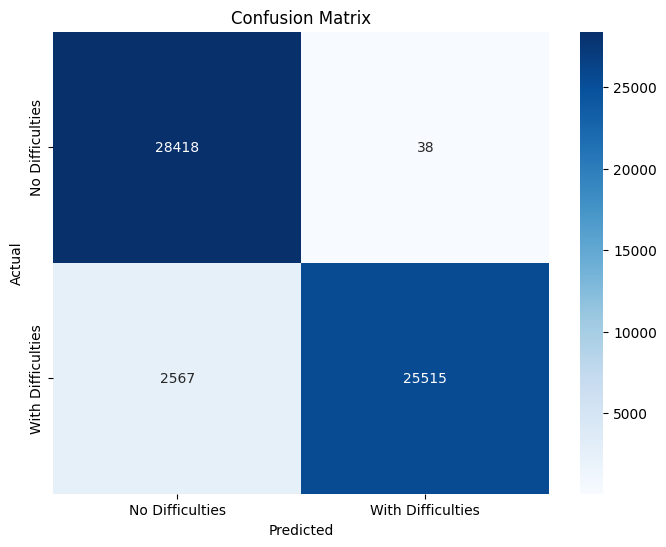

In [34]:
# Initialize and train the LightGBM model
lgb_model = lgb.LGBMClassifier(n_jobs=-1, random_state=42)
lgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lgb = lgb_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_lgb))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_lgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Difficulties', 'With Difficulties'],
            yticklabels=['No Difficulties', 'With Difficulties'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Random Forest
* Type: Ensemble of Decision Trees
* Best For: Reducing overfitting and improving model stability
* How It Works: 
    - Random Forest is an ensemble learning method that creates multiple decision trees and combines their predictions.
    - Each tree is trained on a random subset of the data (bootstrap sampling).
    - The final prediction is made by majority voting (classification) or averaging (regression).
* Key Features  
    ✅ Robust to overfitting due to averaging multiple trees.  
    ✅ Handles missing data and categorical variables well.  
    ✅ Good for feature importance analysis.  
* Limitations  
    ❌ Slower training & prediction time than single models.  
    ❌ Not as interpretable as Logistic Regression.

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     28456
         1.0       1.00      0.92      0.96     28082

    accuracy                           0.96     56538
   macro avg       0.96      0.96      0.96     56538
weighted avg       0.96      0.96      0.96     56538



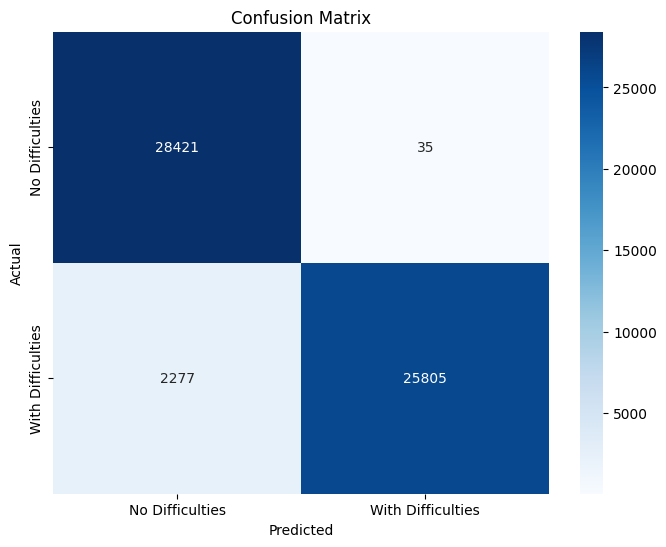

In [35]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_rf))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Difficulties', 'With Difficulties'],
            yticklabels=['No Difficulties', 'With Difficulties'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


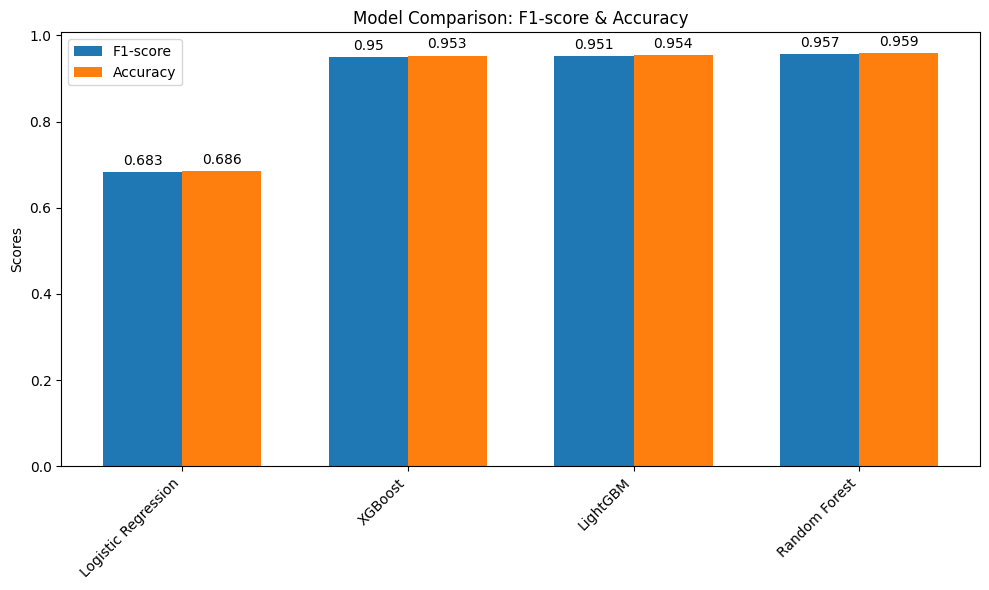

In [36]:
model_names = ['Logistic Regression', 'XGBoost', 'LightGBM', 'Random Forest']
f1_scores = []
accuracy_scores = []

# Evaluate Logistic Regression
f1_scores.append(f1_score(y_test, y_pred))
accuracy_scores.append(accuracy_score(y_test, y_pred))


# Evaluate XGBoost
f1_scores.append(f1_score(y_test, y_pred_xgb))
accuracy_scores.append(accuracy_score(y_test, y_pred_xgb))


# Evaluate LightGBM
f1_scores.append(f1_score(y_test, y_pred_lgb))
accuracy_scores.append(accuracy_score(y_test, y_pred_lgb))


# Evaluate Random Forest
f1_scores.append(f1_score(y_test, y_pred_rf))
accuracy_scores.append(accuracy_score(y_test, y_pred_rf))

# Create the plot
x = np.arange(len(model_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, f1_scores, width, label='F1-score')
rects2 = ax.bar(x + width/2, accuracy_scores, width, label='Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Model Comparison: F1-score & Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha="right")
ax.legend()

# Attach a text label above each bar in *rects*, displaying its height
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height,3)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


I chose **Random Forest** because it achieved the highest performance among all tested models, with an **accuracy of 0.9571** and an **F1-score of 0.9591**, outperforming Logistic Regression, XGBoost, and LightGBM. Its ensemble approach provides strong generalization, reducing overfitting while maintaining high predictive power, making it the best choice for this classification task.

## Testing on Test Set

In [37]:
# Preprocess the test data using the same pipeline fitted on the training data
X_test_processed = preprocessor.transform(test_data)

# Make predictions using the trained Random Forest model
y_pred_test = rf_model.predict(X_test_processed)


# Assuming 'SK_ID_CURR' is the ID column in your test data
submission = pd.DataFrame({'SK_ID_CURR': test_data['SK_ID_CURR'], 'TARGET': y_pred_test})

# Save to CSV
submission.to_csv('submission.csv', index=False)

print("Predictions saved to submission.csv")


Predictions saved to submission.csv


In [38]:
submission['TARGET'].value_counts()

TARGET
0.0    48649
1.0       95
Name: count, dtype: int64

In [39]:
# prompt: save rf_model

import joblib

# Assuming 'rf_model' is your trained RandomForestClassifier
# Save the model to a file
joblib.dump(rf_model, 'rf_model.joblib')


['rf_model.joblib']

## Conclusion

### Main Findings on EDA
* Age and Loan Difficulties
    * Younger applicants (Early Career & Young Adults) tend to face more loan difficulties, likely due to limited financial stability and shorter credit histories.
    * Mid-career and experienced individuals have a lower risk, benefiting from stable incomes and established credit behavior.

* Employment Duration & Loan Risk
    * A large proportion of applicants have very short employment histories, correlating with higher loan difficulties.
    * Longer employment durations generally indicate better financial stability and lower default risk, although some long-term employees still face challenges.

* Loan Type Preference
    * Cash Loans (fixed repayment plans) dominate, while Revolving Loans (flexible credit lines) are significantly less common.
    * Customers might prefer structured financing, highlighting the need for affordable, predictable payment plans.

* Education and Loan Behavior
    * The majority of applicants have secondary education, suggesting a need for financial literacy programs to improve repayment behavior.
    * Higher education borrowers may have better financial management skills, leading to lower default risk.

* Housing & Loan Ownership
    * Many applicants own real estate, which can act as collateral and improve creditworthiness.
    * Renters and those in unstable housing conditions may face higher financial challenges, requiring customized risk assessments.

### Recommendation Based on EDA
* Enhance Loan Risk Assessment Models
    * Incorporate employment duration as a key risk factor to identify high-risk applicants.
    * Consider age groups when structuring repayment plans, offering flexible options for young borrowers.
* Develop Financial Education Programs
    * Provide budgeting and loan management workshops for secondary-educated customers.
    * Offer credit-building products for young professionals and short-term employees.
* Introduce Tailored Loan Products
    * Design short-term, lower-interest loans for individuals with limited job history.
    * Offer customized financial solutions for real estate owners versus renters.
* Optimize Revolving Credit Offerings
    * Expand awareness of revolving loans to increase their adoption among qualified customers.
    * Improve accessibility and transparency in repayment terms to attract new customer segments.

### Impact of Scorecard Model on Home Credit Indonesia
Implementing a scorecard model can significantly enhance Home Credit Indonesia's risk assessment and loan approval process. By leveraging key features such as employment duration, credit history, financial behavior, and demographic factors, the model helps identify customers more likely to face loan difficulties.

Key Benefits:
* Improved Risk Prediction: The model accurately distinguishes between high-risk and low-risk applicants, reducing defaults.
* Better Credit Decisions: Automating risk assessment allows for faster, data-driven loan approvals.
* Optimized Customer Segmentation: Identifying different risk groups enables the company to tailor loan offerings and interest rates accordingly.
* Fair and Transparent Lending: Standardized credit scoring ensures fair treatment of applicants, reducing bias.
* Enhanced Profitability: Lowering non-performing loans (NPLs) leads to higher financial stability and growth.

Final Thoughts:
By integrating a robust scorecard model, Home Credit Indonesia can enhance loan portfolio quality, improve customer experience, and drive sustainable growth while maintaining a competitive edge in the financial market. 🚀